<a href="https://colab.research.google.com/github/changsin/TDD/blob/main/tdd_python/notebooks/SOLID_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import glob
import os

def glob_files(folder, file_type='*'):
    search_string = os.path.join(folder, file_type)
    files = glob.glob(search_string)

    print('Searching ', search_string)
    paths = []
    for f in files:
      if os.path.isdir(f):
        sub_paths = glob_files(f + '/')
        paths += sub_paths
      else:
        paths.append(f)

    # We sort the images in alphabetical order to match them
    #  to the annotation files
    paths.sort()

    return paths

def glob_folders(folder, file_type='*'):
    search_string = os.path.join(folder, file_type)
    files = glob.glob(search_string)

    print('Searching ', search_string)
    paths = []
    for f in files:
      if os.path.isdir(f):
        paths.append(f)

    # We sort the images in alphabetical order to match them
    #  to the annotation files
    paths.sort()

    return paths

In [39]:
DATA_ROOT = 'C:\\Users\\ChangsinLee\\SkNetworks_CarDashboard_21036\\01.rawData\\2\\BMW\\'

In [5]:
from lxml import etree

def parse_xml(filename):
    image_labels = []

    tree = etree.parse(filename)
    for image in tree.xpath('image'):
        # print(image.attrib['name'])
        name = image.attrib['name']
        width = int(image.attrib['width'])
        height = int(image.attrib['height'])

        boxes = []

        for box in image.xpath('box'):
            xtl = float(box.attrib['xtl'])
            ytl = float(box.attrib['ytl'])
            xbr = float(box.attrib['xbr'])
            ybr = float(box.attrib['ybr'])

            alertwarning = box.attrib['label']
            wtype = box.xpath('attribute[@name="name"]')[0].text
            daynight = box.xpath('attribute[@name="daynight"]')[0].text
            visibility = int(box.xpath('attribute[@name="visibility"]')[0].text)

            box = wtype, alertwarning, daynight, visibility, xtl, ytl, xbr, ybr

            boxes.append(box)

        image_labels.append([name, width, height, np.array(boxes)])

    return np.array(image_labels)


In [6]:
def load_labels(path, file_type='*'):
    files = glob_files(path, file_type=file_type)
    print(files)

    y = []
    dfy = []

    for file in files:
        labels = parse_xml(file)
        y.append([os.path.basename(file), labels])
        for label in labels:
            filename = label[0]
            width = label[1]
            height = label[2]
            boxes = label[3]
            for box in boxes:
                wtype = box[0]
                alertwarning = box[1]
                day = box[2]
                visibility = box[3]

                xtl = box[4]
                ytl = box[5]
                xbr = box[6]
                ybr = box[7]

            # print(label)
                dfy.append([os.path.basename(file), filename, width, height, wtype, alertwarning, day, visibility, xtl, ytl, xbr, ybr])
    
    return np.array(y), np.array(dfy)

y, dfyy = load_labels(DATA_ROOT, file_type='*.xml')
y.shape
# image_labels = parse_xml('C:\\Users\\ChangsinLee\\SkNetworks_CarDashboard_21036\\01.rawData\\2차\\BMW\\BMW_day_0_1.xml')
# image_labels

Searching  C:\Users\ChangsinLee\SkNetworks_CarDashboard_21036\01.rawData\2차\BMW\*.xml
['C:\\Users\\ChangsinLee\\SkNetworks_CarDashboard_21036\\01.rawData\\2차\\BMW\\BMW_day_0_1.xml', 'C:\\Users\\ChangsinLee\\SkNetworks_CarDashboard_21036\\01.rawData\\2차\\BMW\\BMW_day_0_2.xml', 'C:\\Users\\ChangsinLee\\SkNetworks_CarDashboard_21036\\01.rawData\\2차\\BMW\\BMW_day_0_3.xml', 'C:\\Users\\ChangsinLee\\SkNetworks_CarDashboard_21036\\01.rawData\\2차\\BMW\\BMW_day_0_4.xml', 'C:\\Users\\ChangsinLee\\SkNetworks_CarDashboard_21036\\01.rawData\\2차\\BMW\\BMW_day_1_1.xml', 'C:\\Users\\ChangsinLee\\SkNetworks_CarDashboard_21036\\01.rawData\\2차\\BMW\\BMW_day_1_2.xml', 'C:\\Users\\ChangsinLee\\SkNetworks_CarDashboard_21036\\01.rawData\\2차\\BMW\\BMW_day_1_3.xml', 'C:\\Users\\ChangsinLee\\SkNetworks_CarDashboard_21036\\01.rawData\\2차\\BMW\\BMW_day_2_1.xml', 'C:\\Users\\ChangsinLee\\SkNetworks_CarDashboard_21036\\01.rawData\\2차\\BMW\\BMW_day_2_2.xml', 'C:\\Users\\ChangsinLee\\SkNetworks_CarDashboard_21036\\01

C:\Users\CHANGS~1\AppData\Local\Temp/ipykernel_46860/1285046348.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(image_labels)
C:\Users\CHANGS~1\AppData\Local\Temp/ipykernel_46860/1952157694.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(y), np.array(dfy)


(20, 2)

In [7]:
'BMW_day_2_4.xml'[:-6][-1]

'2'

In [267]:
def extract_labels(y):
    labels = []
    for a in y:
        # print(a.shape)  [0][:, 4:7]
        for b in a[1][:, 3]:
            for c in b:
                labels.append(c)
    return np.array(labels)

labels = extract_labels(y)

In [10]:
import pandas as pd

dfy = pd.DataFrame.from_records(dfyy)
dfy.head()


dfy.columns = ['folder', 'filename', 'width', 'height', 'class', 'alertwarning', 'daynight', 'visibility', 'xtl', 'ytl', 'xbr', 'ybr']
dfy.head()

dfy.drop(['filename', 'width', 'height', 'xtl', 'ytl', 'xbr', 'ybr'], inplace=True, axis=1)
dfy.head()

,folder,class,alertwarning,daynight,visibility
0,BMW_day_0_1.xml,StabilityOff,warning,day,1
1,BMW_day_0_1.xml,StabilityOn,warning,day,1
2,BMW_day_0_1.xml,Tire,warning,day,0
3,BMW_day_0_1.xml,Brake,alert,day,0
4,BMW_day_0_1.xml,Brake,alert,day,0


In [11]:

for i in range(len(dfy)):
    # print(dfy.loc[i]['category'])
    dfy.loc[i]['folder'] = dfy.loc[i]['folder'][-7]
    dfy.loc[i]['class'] = dfy.loc[i]['alertwarning'] + '@' + dfy.loc[i]['class']

dfy.drop('alertwarning', inplace=True, axis=1)
dfy.head()
# dfy.loc[0]['category'][-7]



,folder,class,daynight,visibility
0,0,warning@StabilityOff,day,1
1,0,warning@StabilityOn,day,1
2,0,warning@Tire,day,0
3,0,alert@Brake,day,0
4,0,alert@Brake,day,0


In [12]:
dfy['daynight'] = pd.Categorical(dfy['daynight']).codes

# dfy['alertwarning'] = pd.Categorical(dfy['alertwarning']).codes

# reorder the columns
dfy = dfy[['class', 'daynight', 'folder', 'visibility']]

dfy.tail()


,class,daynight,folder,visibility
6203,warning@Engine,1,2,2
6204,alert@Seatbelt,1,2,2
6205,warning@Engine,1,2,1
6206,alert@Brake,1,2,0
6207,alert@Seatbelt,1,2,0


In [13]:
names = pd.unique(dfy['class'])
print("\tclass\tzero-object-ratio\t0-in-f0-ratio\tnon-f0-ratio")
for name in names:
    dfys = dfy[dfy['class'] == name]

    # dfyw = dfy[dfy['class'] == name]

    total = len(dfys)
    total_zeros = len(dfys[dfys['visibility'] == '0'])
    # total objects in zero folder - there could more 1 or 2 visibility objects too
    zero_f_total = len(dfys[dfys['folder'] == '0'])

    df_fzeros = dfys[dfys['folder'] == '0']
    # pure zero visibility objects in zero folder
    zeros_in_zero_f = len(df_fzeros[df_fzeros['visibility'] == '0'])
    print("{}\t{} ({}/{})\t{} ({}/{})\t{} ({}/{})".format(
        name, round(total_zeros/total, 2), total_zeros, total,
            round(zeros_in_zero_f/zero_f_total, 2) if zero_f_total != 0 else 0, zeros_in_zero_f, zero_f_total,
            round((total_zeros - zeros_in_zero_f)/total_zeros, 2), total_zeros - zeros_in_zero_f, total_zeros))


	class	zero-object-ratio	0-in-f0-ratio	non-f0-ratio
warning@StabilityOff	0.33 (207/622)	0.56 (132/234)	0.36 (75/207)
warning@StabilityOn	0.34 (205/607)	0.5 (117/233)	0.43 (88/205)
warning@Tire	0.39 (255/651)	0.59 (160/273)	0.37 (95/255)
alert@Brake	0.44 (291/657)	0.9 (124/138)	0.57 (167/291)
alert@Seatbelt	0.47 (432/914)	0.65 (134/206)	0.69 (298/432)
warning@Steering	0.52 (213/410)	0.92 (109/119)	0.49 (104/213)
warning@Brake	0.28 (120/427)	0.41 (80/193)	0.33 (40/120)
warning@Engine	0.45 (483/1079)	0.68 (225/333)	0.53 (258/483)
alert@Retaining	0.4 (94/233)	0.69 (11/16)	0.88 (83/94)
warning@ABS	0.45 (141/314)	0.39 (47/121)	0.67 (94/141)
warning@CentralMonitoring	0.53 (28/53)	1.0 (5/5)	0.82 (23/28)
alert@EngineOilTemp	0.62 (147/239)	0.82 (62/76)	0.58 (85/147)
warning@EPC	0.5 (1/2)	0 (0/0)	1.0 (1/1)


In [42]:
path = DATA_ROOT + 'BMW_day_0_1'

import cv2

IMAGE_SIZE = 320

def load_images(path, file_type="*"):
    files = glob_files(path, file_type)

    images = []
    for file in files:
        print(file)
        image = cv2.imread(file)
        if image is not None:
            # image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
            # normalize
            # image = image / 255
            images.append(image)
        else:
            print(file, ' is not an image file')

    return np.array(images)

def plot_images(X, idx=None, limit=20):
  fig = plt.figure(figsize=(20,20))

  # The number of images for plotting is limited to 50
  end_id = len(X) if len(X) < limit else limit
  if idx is None:
    idx = range(0, end_id)

  i = 0
  for id in idx:
    axis = fig.add_subplot(5, 4, i+1)
    plt.axis('off')
    image = X[id]
    plt.imshow(image)
    i += 1


In [45]:
path

'C:\\Users\\ChangsinLee\\SkNetworks_CarDashboard_21036\\01.rawData\\2\\BMW\\BMW_day_0_1'

In [59]:
y_01, dfyy_01 = load_labels(DATA_ROOT, file_type='BMW_day_0_1*.xml')
y_01[0][0]

Searching  C:\Users\ChangsinLee\SkNetworks_CarDashboard_21036\01.rawData\2\BMW\BMW_day_0_1*.xml
['C:\\Users\\ChangsinLee\\SkNetworks_CarDashboard_21036\\01.rawData\\2\\BMW\\BMW_day_0_1.xml']


C:\Users\CHANGS~1\AppData\Local\Temp/ipykernel_46860/1285046348.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(image_labels)
C:\Users\CHANGS~1\AppData\Local\Temp/ipykernel_46860/1952157694.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(y), np.array(dfy)


'BMW_day_0_1.xml'

In [128]:
def load_Xy(path, file_type='*'):
    files = glob_files(path, file_type=file_type)
    print(files)

    y = []

    X = []

    for file in files:
        labels = parse_xml(file)
        # y.append([os.path.basename(file), labels])
        for label in labels:
            filename = label[0]

            image_filename = os.path.join(file[:-4], filename)
            # print(image_filename)
            X.append(cv2.imread(image_filename))

            width = label[1]
            height = label[2]
            boxes = label[3]

            y.append([filename, width, height, boxes])
    return np.array(X), np.array(y)

In [133]:
# images = load_images(path)
X, y = load_Xy(DATA_ROOT, file_type='BMW_day_1_1*.xml')
X.shape

Searching  C:\Users\ChangsinLee\SkNetworks_CarDashboard_21036\01.rawData\2\BMW\BMW_day_1_1*.xml
['C:\\Users\\ChangsinLee\\SkNetworks_CarDashboard_21036\\01.rawData\\2\\BMW\\BMW_day_1_1.xml']


C:\Users\CHANGS~1\AppData\Local\Temp/ipykernel_46860/1285046348.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(image_labels)
C:\Users\CHANGS~1\AppData\Local\Temp/ipykernel_46860/1460335185.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(X), np.array(y)


(117, 1080, 1920, 3)

In [143]:
import matplotlib.patches as patches

COLORS = [(0, 255/255, 0), (255/255, 255/255, 0), (255/255, 0, 0)]

def create_patch_rectangle(y, color):
  width = int(y[2] - y[0])
  height = int(y[3] - y[1])
  return patches.Rectangle((y[0], y[1]),
                           width, height,
                           edgecolor=color, fill=False)

def plot_image(image, boxes, axis):
  for box in boxes:
    class_id = int(box[0])
    rect = create_patch_rectangle(box[1:], COLORS[class_id])
    axis.add_patch(rect)

  plt.imshow(image)

def plot_images_with_boxes(X, y, idx=None, limit=20):
  fig = plt.figure(figsize=(150, 150))

  # The number of images for plotting is limited to 50
  end_id = len(X) if len(X) < limit else limit
  if idx is None:
    idx = range(0, end_id)

  i = 0
  for id in idx:
    boxes = y[id][3][:, 3:9]
    npboxes = []
    for a in boxes:
      npboxes.append([int(float(i)) for i in a])
    boxes = np.array(npboxes)
    # print(npboxes)
    # break
    axis = fig.add_subplot(5, 5, i+1)
    # plt.axis('off')
    # image = X[id]
    # plt.imshow(image)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    plot_image(X[id], boxes, axis)
    i += 1

Searching  C:\Users\ChangsinLee\SkNetworks_CarDashboard_21036\01.rawData\2\BMW\BMW_day_2_3*.xml
['C:\\Users\\ChangsinLee\\SkNetworks_CarDashboard_21036\\01.rawData\\2\\BMW\\BMW_day_2_3.xml']


C:\Users\CHANGS~1\AppData\Local\Temp/ipykernel_46860/1285046348.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(image_labels)
C:\Users\CHANGS~1\AppData\Local\Temp/ipykernel_46860/1460335185.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(X), np.array(y)


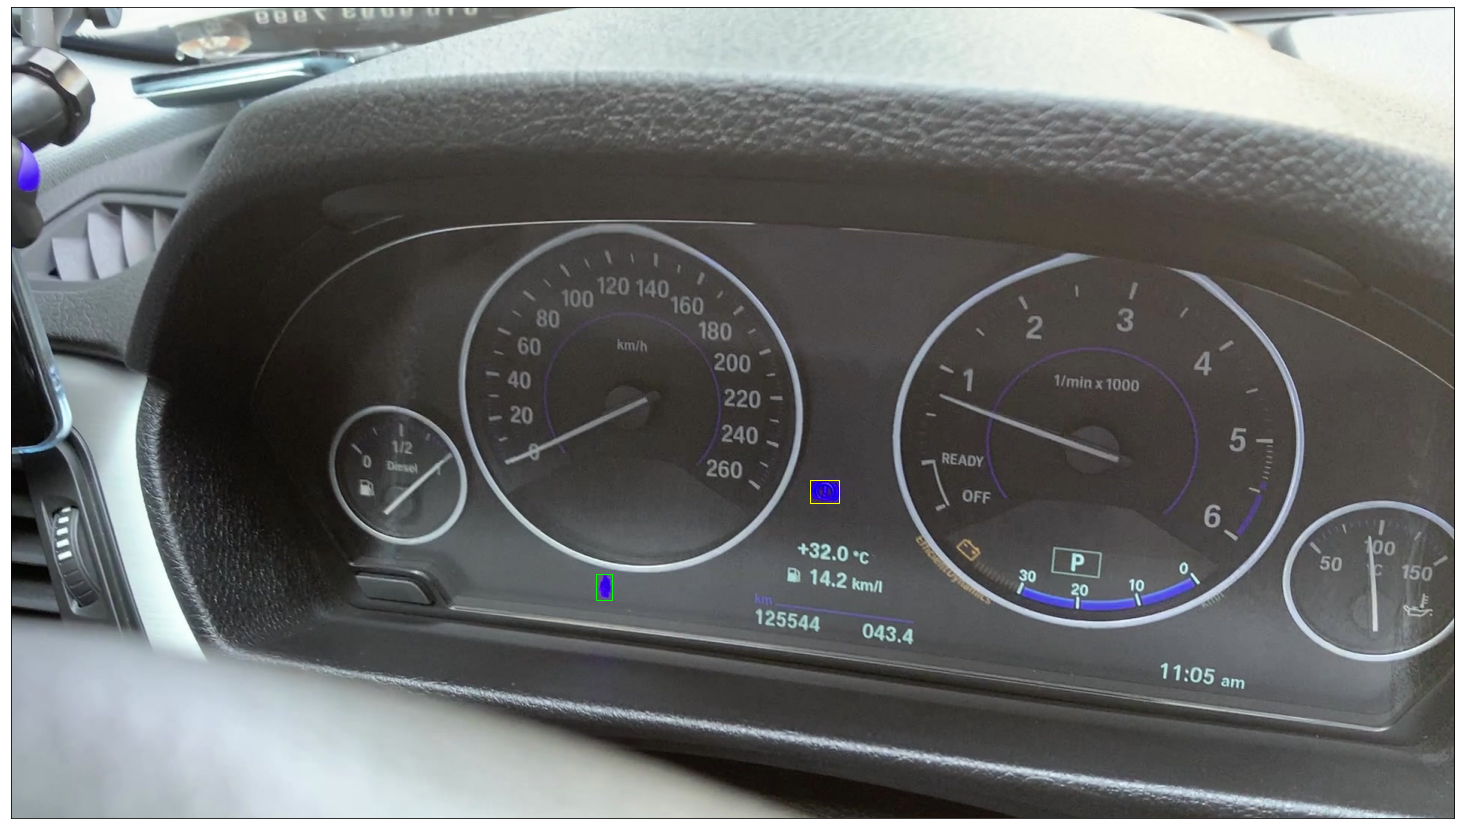

In [158]:
# images = load_images(path)
X, y = load_Xy(DATA_ROOT, file_type='BMW_day_2_3*.xml')

plot_images_with_boxes(X, y, idx=[50], limit=1)